# Lennard-Jones Oscillator (Assignment 1 MS2860) 

By Tanish Verma 
CO24BTECH11023

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Avogadro

## Lennard-Jones Potential and Stability of Oscillations

In the Lennard-Jones (LJ) potential:  

- For **x < σ**:  
  - The potential energy (PE) of the system increases rapidly and approaches infinity as *x → 0*. 

- At **X = σ**
  - The Potential Energy (PE) of the system becomes 0
  
- For **x > σ**:  
  - The potential energy decreases until it reaches a **minimum** at approximately *x ≈ 1.12σ*.  
  - Beyond this point, the potential increases again and becomes Asymptotic with  **PE = 0**  i.e as *x → ∞* , PE → 0.  

---

### Stability Criterion

- If the **total energy E = 0**, the particle is capable of escaping to infinity with a small push.  
- For **stable oscillations**, the particle must remain **bound** within the potential well.  
  - This requires the **total energy** of the system to be **less than zero**:  


---

### Project Assumption

Throughout this project, we define **stable oscillations** in the Lennard-Jones potential as those for which the **total energy remains negative**.


## Initializing Parameters

1. σ = 3.40 Å
2. ε = 0.0104 eV
3. X0 = initial position , for this case taken to be 1.12*σ i.e the point of minima of the model. Can be taken as any value as well. 
4. dt = 0.001 ps
5. n = 1000000 <Large Number I know >
6. m0 = mass of Argon atom  = (39.948/Avogadro)*1e-3 Kg
7. V0 to be determined

In [52]:
sigma = 3.40 #Å
epsilon = 0.0104 #ev
x0 = 1.12*sigma #Å #Point of minima of the PE. Obtained from the material shared
dt = 0.001 #ps
n = 1000000
m0 = (39.948/Avogadro)*1e-3 #Kg

For the particle to oscillate in our Toy model, the total energy `E` of the system must be less than zero:

- **Condition:**   E < 0 => KE + PE < 0
  

- Rearranging:   KE < -PE
  
- **At x = 1.12*σ we obtain PE = ε**

- Expanding using the defintion of KE  (m*v**2)/2 = ε
  
- From this we get:  |v| < sqrt{2*ε/m}

- Substituting Values, we get: |v| < 224 m/s

- Since our `x` and `dt` are in **Ångströms** and **picoseconds**, we convert units to get:  **|v| < 2.2 Å/ps**

- Therefore, lets assume our v0 to be **v0 = 2 Å/ps**


In [53]:
v0 = 2

## Helper Functions

In [54]:
def potential_energy(x,sigma = sigma , epsilon = epsilon):
    """Calculates the potential energy of the particle according to Lennard-Jones potential

    Args:
        x (float): the position of particle
        sigma (float, optional): the distance at which the interatomic potential energy between two atoms is zero. Defaults to sigma.
        epsilon (float, optional): the absolute value of the minimum of the potential energy. Defaults to epsilon.

    Returns:
        float: The potential energy at that point(eV)
    """
    #docstring is made with the help of autodocstring extension
    return 4*epsilon*( ((sigma/x)**12) - ((sigma/x)**6))


In [55]:
def Force(x,sigma = sigma , epsilon = epsilon): 
    """Calculates force at particle

    Args:
        x (float): Position
        sigma (float, optional): the distance at which the interatomic potential energy between two atoms is zero. Defaults to sigma.
        epsilon (float, optional): the absolute value of the minimum of the potential energy. Defaults to epsilon.

    Returns:
        float: Force at particle (eV/Å)
    """
    return 4*epsilon*((((12*sigma**12)/(x**13)))-(((6*sigma**6)/(x**7))))


In [56]:
def acceleration(x, m = m0):
    """Helper Function to calculate acceleration

    Args:
        x (float): Position
        m (float, optional): mass of argon atom in Kg. Defaults to m0.

    Returns:
        float: Acceleration of the body (Å/ps*2)
    """
    return (Force(x)*1.602*10**(-23))/m

In [57]:
def Kinetic_Energy(v, m=m0):
    """Calculates KE

    Args:
        v (float): velocity of particle
        m (float, optional): mass of atom. Defaults to m.

    Returns:
        float: KE (eV)
    """
    return ((m*v**2)*10**23)/(2*1.602)


In [58]:
def BisectionMethod(f,xl,xr,tol):
    """Calculates the Root of f around the initial guess

    Args:
        f (Function): Function to get root of 
        xl (float): left guess value
        xr (float): right guess Value
        tol (float): tolerance Value

    Raises:
        Exception: if both signs are equal then root cannot be computed

    Returns:
        float: Root of the equation
    """
    if np.sign((f(xl))) == np.sign(f(xr)):
        raise Exception("No real roots")
    m = (xl+xr)/2
    if(np.abs(f(m))<tol):
        return m
    elif (np.sign(f(xl)) == np.sign(f(m))):
        return BisectionMethod(f,m,xr,tol)
    elif (np.sign(f(xr)) == np.sign(f(m))):
        return BisectionMethod(f,xl,m,tol)


## VERLET Algorithm


In [59]:
x = np.zeros(n+1 ,dtype=float) #I have taken x and a of size n+1 such that my velocity doesnt abruptly become zero at the last case
v = np.zeros(n ,dtype=float)
a = np.zeros(n+1 ,dtype=float)

x[0] = x0
x[1] = x0 + v0*dt
v[0] = v0
a[0] = acceleration(x[0])
a[1] = acceleration(x[1])

In [ ]:
for i in range(2,n+1):
    x[i] = 2*(x[i-1]) + a[i-1]*dt*dt - x[i-2]
    v[i-1] = (x[i] - x[i-2])/(2*dt)
    a[i] = acceleration(x[i])
x

array([3.808     , 3.81      , 3.81200008, ..., 5.53236857, 5.53240944,
       5.53244978], shape=(1000001,))

In [61]:
x = x[:-1]#to reduce the size of x from 1000001 to 1000000

## Plots

In [62]:
F = Force(x)
U = potential_energy(x)

### Potential Energy vs X plot

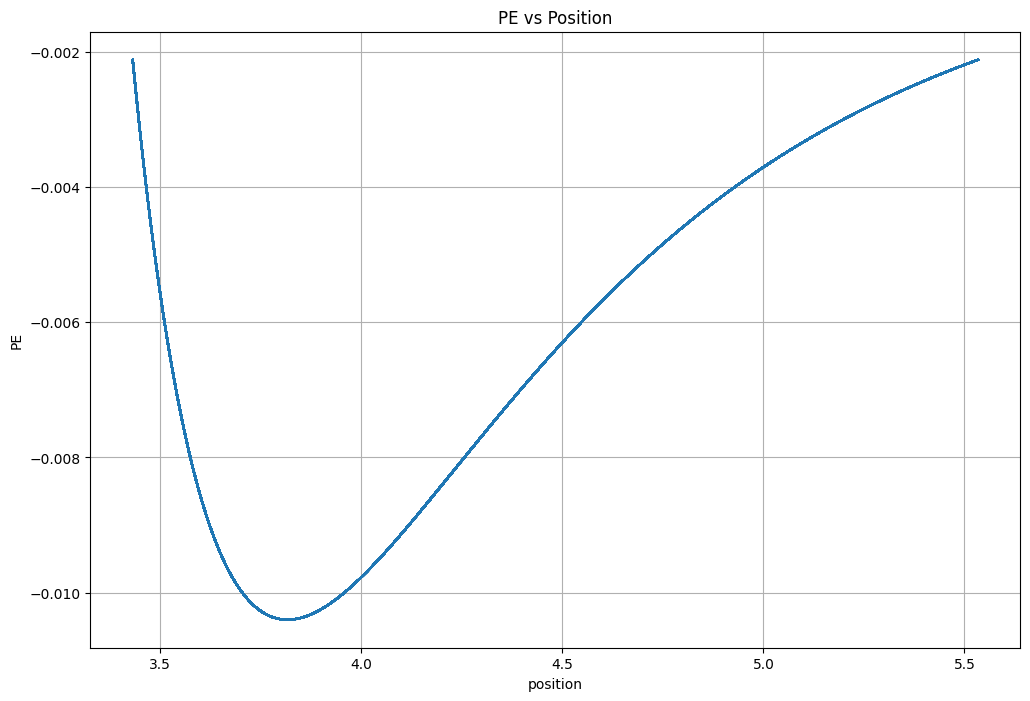

In [63]:
plt.figure(figsize=(12,8))
plt.plot(x,U)
plt.grid()
plt.title("PE vs Position")
plt.xlabel('position')
plt.ylabel('PE')
plt.show()

### Minima of PE

We can obtain the minima by simply finding the index of the minimum value in our `U` (PE) array and finding the position (x) corresponding to the index in our `X` array

Note this is an approximate value , the true value can be found by equating **du/dx = 0** i.e Force(x) = 0

In [78]:
#Approx value
minUidx = np.argmin(U)
minU_x = x[minUidx]

print("The minimum of the potential energy is obtained at x ≈", minU_x, "Å")

The minimum of the potential energy is obtained at x ≈ 3.8163693965416803 Å


In [79]:
# actual value 
# let xl = 3.6, xr = 4 and f = 4*epsilon*((((12*sigma**12)/(x**13)))-(((6*sigma**6)/(x**7)))) and tol as 1e-6

xl = 3.6
xr = 4
f = lambda x:4*epsilon*((((12*sigma**12)/(x**13)))-(((6*sigma**6)/(x**7))))
tol = 1e-6
Xminima = BisectionMethod(f,xl,xr,tol)

print("The minimum of the potential energy is obtained at x =", Xminima, "Å")    

The minimum of the potential energy is obtained at x = 3.816357421875 Å


### Force vs X plot

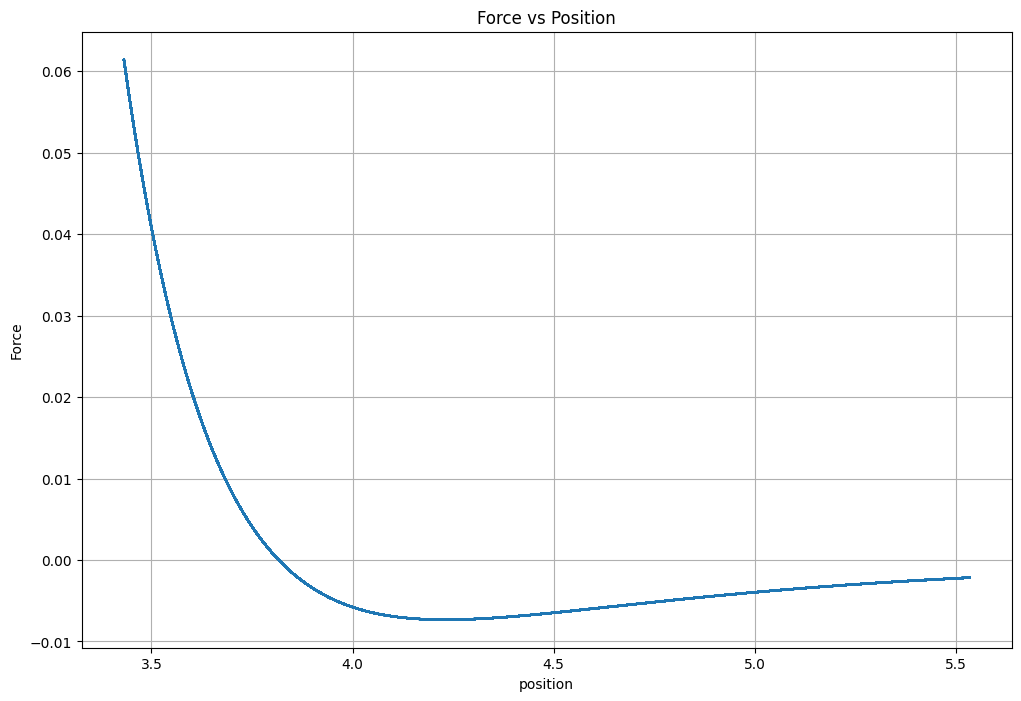

In [66]:
plt.figure(figsize=(12,8))
plt.plot(x,F)
plt.grid()
plt.title("Force vs Position")
plt.xlabel('position')
plt.ylabel('Force')
plt.show()

### Force at minima of PE 

In [81]:
print("The force acting at the minima of Potential Energy is F =", Force(Xminima),"eV/Å")

The force acting at the minima of Potential Energy is F = 6.962668954390238e-07 eV/Å


### Momentum VS X plot

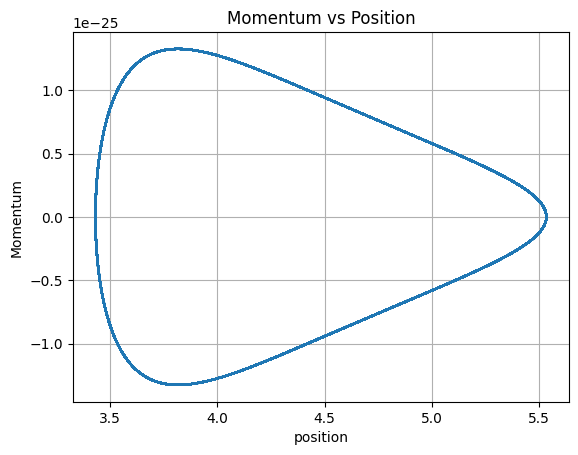

In [68]:
plt.Figure(figsize=(12,8))
plt.plot(x,m0*v)
plt.grid()
plt.title('Momentum vs Position')
plt.xlabel('position')
plt.ylabel('Momentum')
plt.show()

### Stability of Oscillations around x0

As defined at the starting of the project, for an oscillation to be stable the total energy `E` must be less than 0 i.e **E<0**

In [69]:
Tot_Energy = potential_energy(x0) + Kinetic_Energy(v0)
Tot_Energy

-0.0021166208798839604

As we can see, the **total energy is negative**, which means the system exhibits **stable oscillations around x₀**.  

In fact, we already expected this outcome because the **initial velocity v₀** was derived using the same stability condition (`E < 0`).  
Thus, the system was ensured to remain in a **bound oscillatory state** from the very beginning.

### Condition on position for instability


As we know oscillations become unstable when the total Energy of the system E >= 0. 
- For a given velocity  `v0`, we can **mathematically find the minimum and the maximum initial position** `x0` required for stable oscillations by ensuring the total energy **E < 0**.
  
- The total energy is given by: E = KE + PE =  (m v0^2)/2 + U(x0)
  - where `U(x0)` is the Lennard-Jones potential at `x0`.
  
- Setting ** E = 0** gives the threshold for instability: (m v0^2)/2 + U(x0) = 0
  
-  Rearranging we get:  U(x_0) = - (m v_0^2)/2
  
- To find the minimum x0 for a given v0, we solve for x0 such that the potential energy at x0 equals **-(m v0^2)/2** .
  
- For **v0 = 2 Å/ps**  and  **m = m0 = 6.63*10^{-26} kg** , and converting the kinetic energy to eV we get: KE =  0.008280368450278923 eV
  
- We numerically solve for x0 by using bisection method. 

### Defining Parameters for Bisection Method

- **tol = 1e-6**  

- **xl = σ**  
  At `x = σ`, the potential energy `U = 0`.  
  Hence, total energy `PE + KE > 0`.  

- **xm = x₀**  
  At `x = x₀`, the total energy is **negative** (`E < 0`).  

- **xr = 2σ**  
  At `x = 2σ`, the total energy is **positive**.  
  (This can be verified using the helper functions.)  

- **f(x) = 4ε[(σ/x)¹² – (σ/x)⁶] + KE**  
  Defines the total energy at any position `x`.

---

### Stability Range

- We use **[xl, xm]** in our Bisection method to determine the **lower bound** of stable oscillations.  
- We use **[xm, xr]** in our Bisection method to determine the **upper bound** of stable oscillations.  

From this we obtain the range of `x` for which our oscillations are stable.


In [70]:
ke = 0.008280368450278923
tol = 1e-6
xl = sigma 
xm = x0 
xr = 2*sigma 
f = lambda x: (4*epsilon*( ((sigma/x)**12) - ((sigma/x)**6))) + ke


xmin = BisectionMethod(f,xl,xm,tol)
xmax = BisectionMethod(f,xm,2*sigma,tol)
print("The minimum value of X for which the system is stable at a given velocity is Xmin =",xmin)
print("The maximum value of X for which the system is stable at a given velocity is Xmax =",xmax)

The minimum value of X for which the system is stable at a given velocity is Xmin = 3.5865683593750006
The maximum value of X for which the system is stable at a given velocity is Xmax = 4.218158203125


Thus system is stable when the position lies within the range:  

- For **X < Xmin** → the particle enters the repulsive core, and oscillations become **unstable**.  
- For **X > Xmax** → the particle has enough energy to escape the potential well, leading again to **unstable motion**.  

Hence, **stable oscillations occur only if x0 is within the bounded region** `[Xmin, Xmax]` for the velocity V0.


### KE, PE, E VS t plot


In [ ]:
#For time plotting we need time vector 
t = np.zeros(n, dtype=float)
for i in range(n):
    t[i] = i*dt
t

array([0.00000e+00, 1.00000e-03, 2.00000e-03, ..., 9.99997e+02,
       9.99998e+02, 9.99999e+02], shape=(1000000,))

In [72]:
#Getting the Kinetic Energy Vector (K) and Total Energy Vector (E)
K = Kinetic_Energy(v)
E = K + U

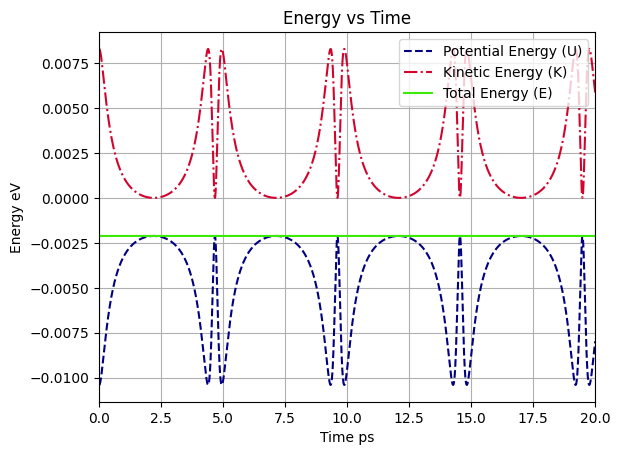

In [73]:
plt.Figure(figsize=(15,10))
plt.plot(t,U, color = '#000080',ls = '--')
plt.plot(t,K, color = '#D2042D' ,ls = '-.')
plt.plot(t,E, color = "#3AEB0A")
plt.grid()
plt.legend(['Potential Energy (U)', 'Kinetic Energy (K)','Total Energy (E)'], loc='upper right')
plt.xlim(0,20)
plt.title("Energy vs Time")
plt.xlabel('Time ps')
plt.ylabel('Energy eV')
plt.show()

To check if the Energy is being balanced we can check the standard deviation of the total Energy as standard Deviation of a constant array is 0.

In [74]:

std = np.std(E)
if std < 1e-6:
    print("Conclusion: The total energy is effectively constant throughout the simulation (std < 1e-6).")
else:
    print("Conclusion: The total energy is not constant (std >= 1e-6).")

Conclusion: The total energy is effectively constant throughout the simulation (std < 1e-6).


Hence , from the result of the above code it is clear that Energy is conserved throughout

## Time variation sensitivity of model 

To get the time variation I am simulating the model for different dt values.

In [87]:
dt_array = np.array([0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1])

x_dtvar = np.zeros((n+1,dt_array.size) ,dtype=float)
v_dtvar = np.zeros((n,dt_array.size) ,dtype=float)
a_dtvar = np.zeros((n+1,dt_array.size) ,dtype=float)

for i in range(dt_array.size):
    dt = dt_array[i]
    x_dtvar[0,i] = x0
    x_dtvar[1,i] = x0 + v0*dt
    v_dtvar[0,i] = v0
    a_dtvar[0,i] = acceleration(x[0])
    a_dtvar[1,i] = acceleration(x[1])
    for j in range(2,n+1):
        x_dtvar[j,i] = 2*(x_dtvar[j-1,i]) + a_dtvar[j-1,i]*dt*dt - x_dtvar[j-2,i]
        v_dtvar[j-1,i] = (x_dtvar[j,i] - x_dtvar[j-2,i])/(2*dt)
        a_dtvar[j,i] = acceleration(x_dtvar[j,i])
    

x_dtvar = x_dtvar[:-1, :] #To reduce the shape from (1000001,9) to (1000000,9)
x_dtvar

array([[3.80800000e+00, 3.80800000e+00, 3.80800000e+00, ...,
        3.80800000e+00, 3.80800000e+00, 3.80800000e+00],
       [3.80820000e+00, 3.80900000e+00, 3.81000000e+00, ...,
        4.00800000e+00, 4.80800000e+00, 5.80800000e+00],
       [3.80840000e+00, 3.81000002e+00, 3.81200008e+00, ...,
        4.20880502e+00, 5.82812560e+00, 7.88850241e+00],
       ...,
       [5.25307294e+00, 5.15422075e+00, 5.53232718e+00, ...,
        2.15470624e+03, 8.60509362e+05, 2.01808268e+06],
       [5.25313178e+00, 5.15457302e+00, 5.53236857e+00, ...,
        2.15470918e+03, 8.60510223e+05, 2.01808469e+06],
       [5.25319061e+00, 5.15492509e+00, 5.53240944e+00, ...,
        2.15471211e+03, 8.60511083e+05, 2.01808671e+06]],
      shape=(1000000, 9))

Calculating Energy changes for each dt iteration 

In [89]:
PE_dtvar = potential_energy(x_dtvar)          # shape (1000000, 9)
KE_dtvar = Kinetic_Energy(v_dtvar)            # shape (1000000, 9)
E_dtvar  = PE_dtvar + KE_dtvar                # total energy
E_dtvar

array([[-2.11662088e-03, -2.11662088e-03, -2.11662088e-03, ...,
        -2.11662088e-03, -2.11662088e-03, -2.11662088e-03],
       [-2.11667455e-03, -2.11686775e-03, -2.11706109e-03, ...,
        -1.41046805e-03,  3.89747234e-03,  7.01142563e-03],
       [-2.11668418e-03, -2.11689442e-03, -2.11706090e-03, ...,
        -7.18791021e-04,  6.26813870e-03,  8.48958613e-03],
       ...,
       [-2.11668399e-03, -2.11688992e-03, -2.11704330e-03, ...,
         1.77942664e-06,  6.13226829e-03,  8.43199768e-03],
       [-2.11668399e-03, -2.11688992e-03, -2.11704330e-03, ...,
         1.77942664e-06,  6.13226829e-03,  8.43199768e-03],
       [-2.11668399e-03, -2.11688992e-03, -2.11704330e-03, ...,
         1.77942664e-06,  6.13226829e-03,  8.43199768e-03]],
      shape=(1000000, 9))

## Analysis of Deviation with Time Step

To show the deviation for changing time step value , we shall plot the energy vs time and also check the standard Deviation of the Energy to see the variation of Energy

### For a stable simulation 

1. **Energy vs Time plot**
   1. The Graph will be a straight line
   
2. **Standard Deviation of Energy**
   1. The standard deviation of a stable system will be less than the tolerance value say 1e-6

### Main Observations to notice:

- If the graph of the Energy vs time is not a straight line then the system blows up at that dt
- If the standard Deviation of the plot is greater than the tolerance then the total energy is not constant , implying the system is unstable



In [101]:
# time 2D matrix
t_dtvar = np.zeros_like(v_dtvar)

for i, dt in enumerate(dt_array):
    t_dtvar[:, i] = np.arange(0, n) * dt

t_dtvar

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e-04, 5.000000e-04, 1.000000e-03, ..., 1.000000e-01,
        5.000000e-01, 1.000000e+00],
       [2.000000e-04, 1.000000e-03, 2.000000e-03, ..., 2.000000e-01,
        1.000000e+00, 2.000000e+00],
       ...,
       [9.999970e+01, 4.999985e+02, 9.999970e+02, ..., 9.999970e+04,
        4.999985e+05, 9.999970e+05],
       [9.999980e+01, 4.999990e+02, 9.999980e+02, ..., 9.999980e+04,
        4.999990e+05, 9.999980e+05],
       [9.999990e+01, 4.999995e+02, 9.999990e+02, ..., 9.999990e+04,
        4.999995e+05, 9.999990e+05]], shape=(1000000, 9))

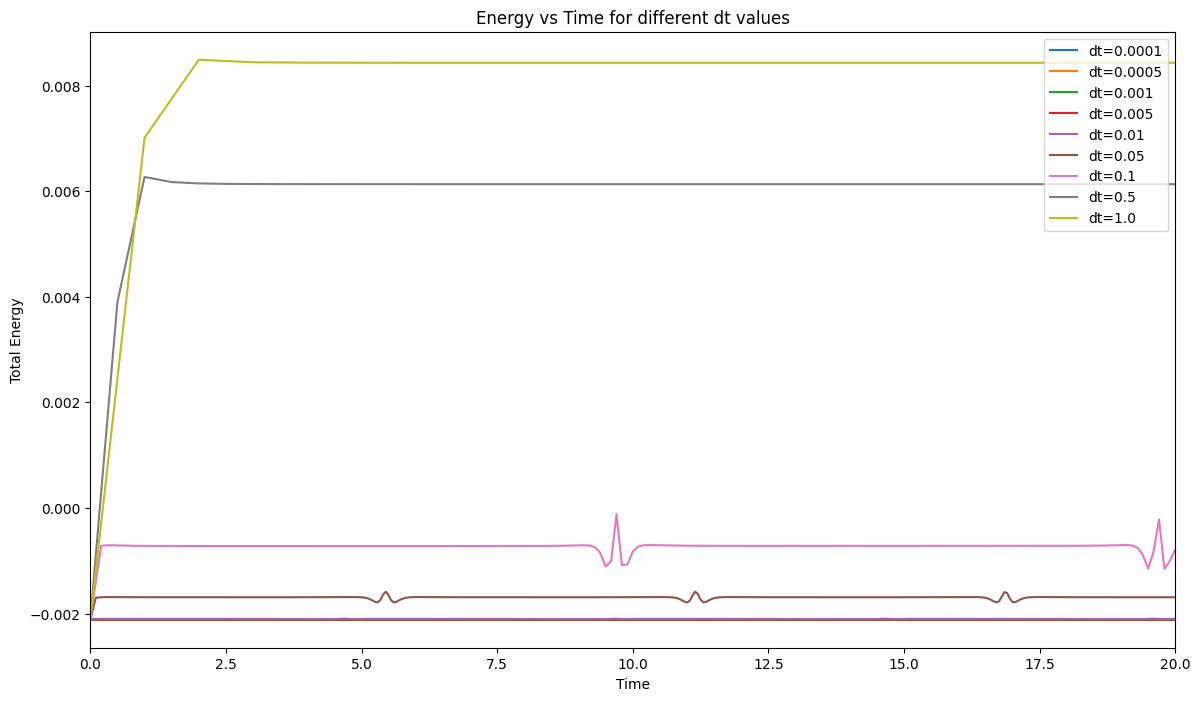

In [129]:
plt.figure(figsize=(14, 8))
for i, dt in enumerate(dt_array):
    plt.plot(t_dtvar[:, i], E_dtvar[:, i], label=f"dt={dt}")
plt.xlabel("Time")
plt.ylabel("Total Energy")
plt.xlim(0,20)
plt.title("Energy vs Time for different dt values")
plt.legend(loc = 'upper right')
plt.show()

In [133]:
print("Standard deviation of total energy for each dt:\n")
for i, dt in enumerate(dt_array):
    std_E = np.std(E_dtvar[:, i])
    print(f"dt = {dt:<6} --> std(E) = {std_E:.3e}")
    if std_E < 1e-6:
        print(f"The system is stable for t = {dt:<6}\n")
    else :
        print(f"The system is unstable for t = {dt:<6}\n")


Standard deviation of total energy for each dt:

dt = 0.0001 --> std(E) = 1.127e-10
The system is stable for t = 0.0001

dt = 0.0005 --> std(E) = 2.348e-09
The system is stable for t = 0.0005

dt = 0.001  --> std(E) = 9.338e-09
The system is stable for t = 0.001 

dt = 0.005  --> std(E) = 2.335e-07
The system is stable for t = 0.005 

dt = 0.01   --> std(E) = 9.345e-07
The system is stable for t = 0.01  

dt = 0.05   --> std(E) = 2.354e-05
The system is unstable for t = 0.05  

dt = 0.1    --> std(E) = 1.945e-04
The system is unstable for t = 0.1   

dt = 0.5    --> std(E) = 8.547e-06
The system is unstable for t = 0.5   

dt = 1.0    --> std(E) = 1.064e-05
The system is unstable for t = 1.0   



## Conclusion

From the plot of *Total Energy vs Time* and the Standard Deviation of Energy for different values of the time step dt, we observe that:

- For very small dt (dt = 0.0001, 0.0005, 0.001, 0.005, 0.001),  
  the total energy is nearly constant with very less deviation, meaning the system is stable for dt <0.001.  

- For moderate dt (e.g., dt = 0.1, 0.05),  
  the energy shows periodic deviations, means that the accuracy of the model is reduced for that time step dt, but it is still acceptable

- For larger dt(e.g., dt = 0.1, 0.5, 1.0),  
  the total energy deviates significantly and increases over time, showing that the system becomes unstable.  

**Therefore, the stability of system varies depending on the choice of time step, and only for sufficiently small dt values we get minimum error.**


### Bonus Momentum vs X plot 

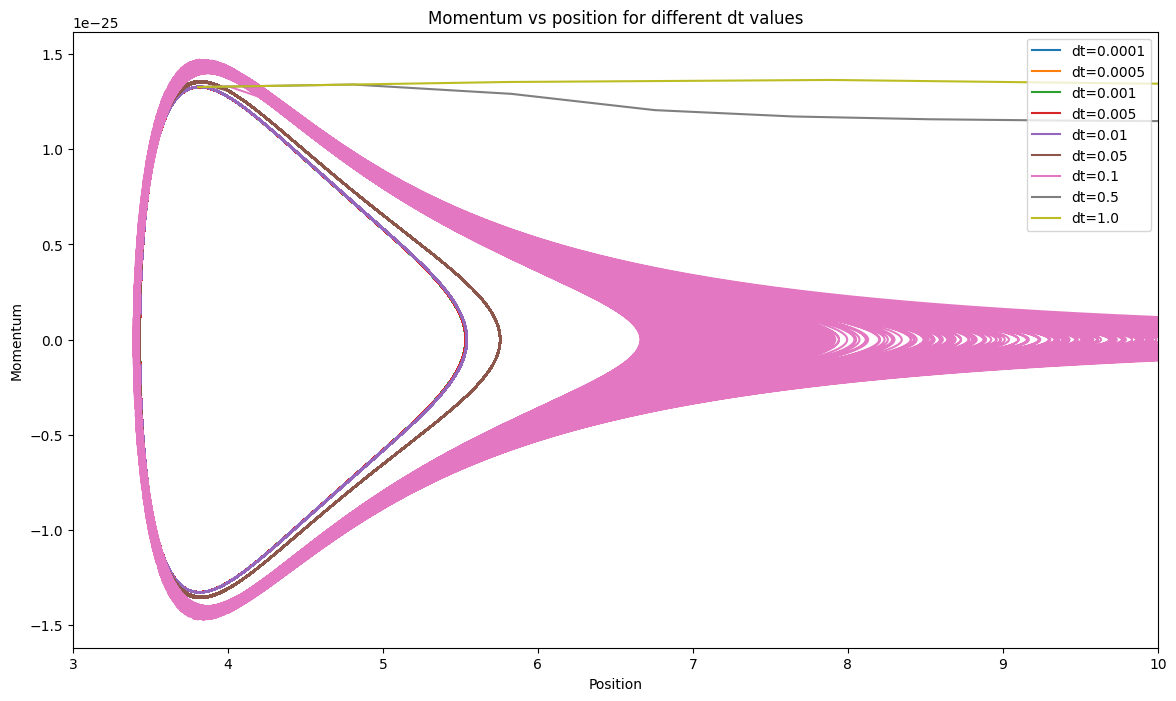

In [142]:
plt.figure(figsize=(14, 8))
for i, dt in enumerate(dt_array):
    plt.plot(x_dtvar[:, i], m0*v_dtvar[:, i], label=f"dt={dt}")
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.xlim(3,10)
plt.title("Momentum vs position for different dt values")
plt.legend(loc = 'upper right')
plt.show()

### Observations from Momentum vs X Plot

- For **dt = [0.5, 1]**, the momentum clearly blows up and the system becomes unstable.  
- For **dt = [0.1, 0.05]**, the curve is not perfectly closed (especially for dt = 0.1), but it still performs better than the large step sizes dt = [0.5, 1].  
- For **dt < 0.01**, all the momentum vs X plots overlap almost perfectly, confirming the same result we saw in the Energy plot:  
  **the stability of the system depends strongly on the choice of time step, and only with sufficiently small dt values do we achieve minimal error.**


Thank you so much for making it all the way through this (admittedly long) assignment! 
I had such a great time working on it that I may have gotten *a little carried away* .  
Apologies for the length